<a href="https://colab.research.google.com/github/DiyaSReddy/EDA/blob/main/eda_major_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train_and_test2.csv to train_and_test2.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
file_path = '/content/train_and_test2.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')


Missing values handling

In [ ]:
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

**1. Survival rate based on gender,class and age**



<ipython-input-26-03199e2597de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='2urvived', data=df, palette='coolwarm')


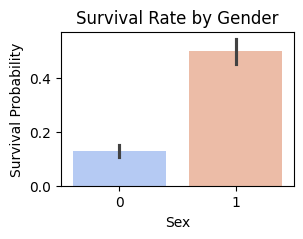

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x='Sex', y='2urvived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.show()

<ipython-input-27-f22f01e18206>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='2urvived', data=df, palette='coolwarm')


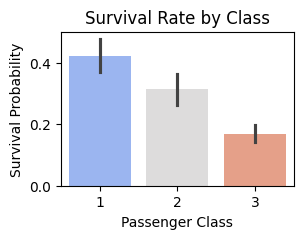

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x='Pclass', y='2urvived', data=df, palette='coolwarm')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

<ipython-input-28-4b1294de587f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('AgeGroup')['2urvived'].mean().reset_index()
<ipython-input-28-4b1294de587f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='2urvived', data=age_grouped, palette='coolwarm')


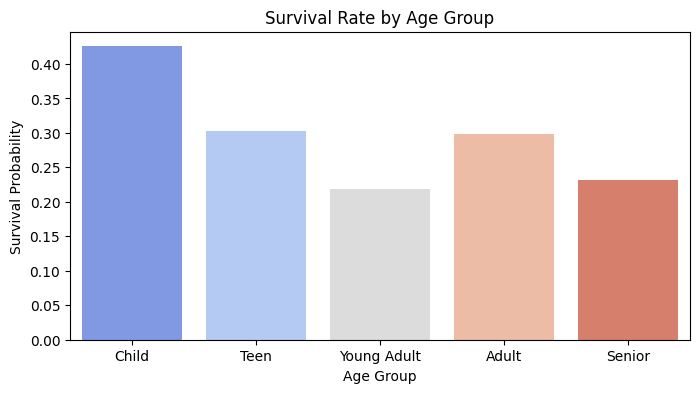

In [ ]:
age_grouped = df.groupby('AgeGroup')['2urvived'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='AgeGroup', y='2urvived', data=age_grouped, palette='coolwarm')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Probability')
plt.show()

2. Impact of fare and family memebers on survival

<ipython-input-29-0108ed3bf35a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = df.groupby('FareGroup')['2urvived'].mean().reset_index()
<ipython-input-29-0108ed3bf35a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FareGroup', y='2urvived', data=fare_grouped, palette='coolwarm')


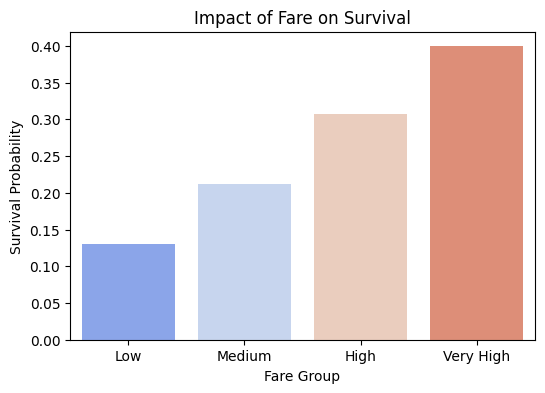

In [ ]:
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
fare_grouped = df.groupby('FareGroup')['2urvived'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='FareGroup', y='2urvived', data=fare_grouped, palette='coolwarm')
plt.title('Impact of Fare on Survival')
plt.xlabel('Fare Group')
plt.ylabel('Survival Probability')
plt.show()

<ipython-input-30-ed7d90ef31fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='2urvived', data=family_grouped, palette='coolwarm')


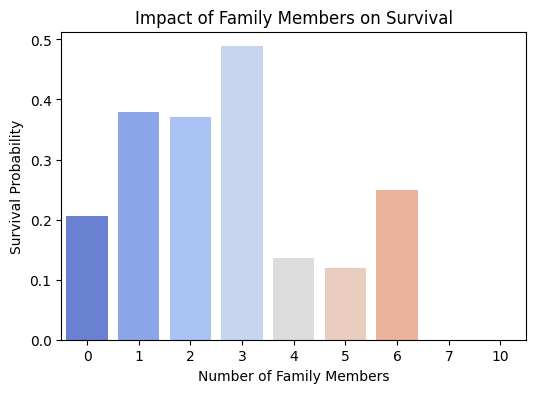

In [ ]:
df['FamilySize'] = df['sibsp'] + df['Parch']
family_grouped = df.groupby('FamilySize')['2urvived'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='FamilySize', y='2urvived', data=family_grouped, palette='coolwarm')
plt.title('Impact of Family Members on Survival')
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Probability')
plt.show()

3. Visualizing survival probability

<ipython-input-35-446a057140a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['2urvived'].value_counts().index.astype(str), y=df['2urvived'].value_counts().values, palette='coolwarm')


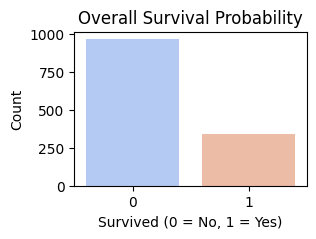

In [ ]:
plt.figure(figsize=(3,2))
sns.barplot(x=df['2urvived'].value_counts().index.astype(str), y=df['2urvived'].value_counts().values, palette='coolwarm')
plt.title('Overall Survival Probability')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()